# Inital Model Builds and Results

In [144]:
# Import Libraries
import numpy as np
import pandas as pd
import sys
import os.path
import matplotlib.pyplot as plt

# Scikit Learn 
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier # For feature Selection
from sklearn.ensemble import RandomForestClassifier # For feature Selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.mixture import GMM # GuassianMixture
from sklearn.decomposition import PCA
from sklearn import metrics

%matplotlib inline

# Import and Prep Data 

In [69]:
# Import Data 
file_path = os.getcwd() + "/data"
trian_df = pd.read_csv(file_path + '/train.csv')
# test_df = pd.read_csv(file_path + '/test.csv') # final test set

# Target Column
train_labels = trian_df['Cover_Type']
trian_df = trian_df.drop('Cover_Type', 1)

In [70]:
# Define variable types
continuous = [
            'Elevation', 'Aspect', 'Slope',
            'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
            'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
            ]

# remove "Soil_Type7","Soil_Type15" because their data was only one value (data cannot be seperable and irrelevantc)
binary = [
        'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
        'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
        'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
        'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
        'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
        'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
        'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
        'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
        'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
        'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
        'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
        'Soil_Type40'
        ]

predictors = continuous + binary

# objective variable is a category
target = 'Cover_Type'


In [71]:

# Drop Binary data (?)


In [72]:
# Test Train Split 
# l = len(target)
X_train, X_test, y_train, y_test = train_test_split(trian_df, train_labels, test_size=0.30, random_state=42)
print "Train data size %i X %i" % (X_train.shape[0], X_train.shape[1])
print "Test data size %i X %i" % (X_test.shape[0], X_test.shape[1])


Train data size 10584 X 55
Test data size 4536 X 55


## Test Model Types

#### Initial Settings for Models

In [88]:
# Fetaure Selection Settings
# grid_search = False
importance_threshold = 0.01

# Model Settings 
run_adaBoost = True
run_GMM = True
run_PCA = True
score = 'f1_weighted'
cv = 10

# Grid Parameters 



# Target Variable Names 
target_names_list = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", 
                "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]
target_names_dict = {1:"Spruce/Fir",2:"Lodgepole Pine",3:"Ponderosa Pine", 
                4:"Cottonwood/Willow",5:"Aspen", 6:"Douglas-fir", 7:"Krummholz"}


### Feature Selection

In [74]:
# Dtree Fetaure Selection 

In [75]:
# Define function for finding feature importance 
def find_fetaure_importnace(X_train_data, y_train_data, importance_threshold): 
    # Make a grid search? 
    dt = DecisionTreeClassifier()
    len(X_train_data)
    len(y_train_data)
    dt.fit(X_train_data, y_train_data)

    # Report Feature Importnace in DTREE 
    importance_df = pd.DataFrame({
        'feature': X_train_data.columns,
        'importance': dt.feature_importances_
    })
    importance_df.sort_values('importance').plot(x='feature', kind='bar')
    
    print "Select only features >= %0.3f importance as predicted by Dtree" % importance_threshold 
    importance_df_reduced = importance_df[importance_df['importance'] >= importance_threshold]
    importance_df_reduced.sort_values('importance').plot(x='feature', kind='bar')
    
    # Select Columns to keep 
    df = X_train_data[importance_df_reduced.feature.values]
    return importance_df_reduced.feature.values, df


Original Dataset Size 10584 X 55
Select only features >= 0.010 importance as predicted by Dtree
Reduced Dataset Size 10584 X 15

Keeping 15 Columns: 
['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Soil_Type3', 'Soil_Type4', 'Soil_Type10']


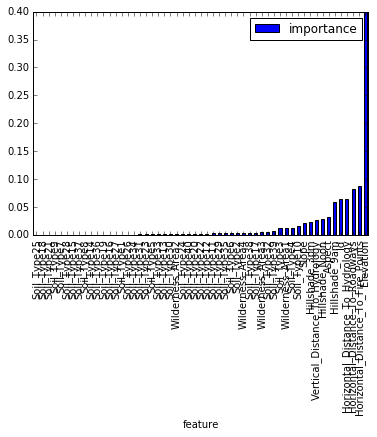

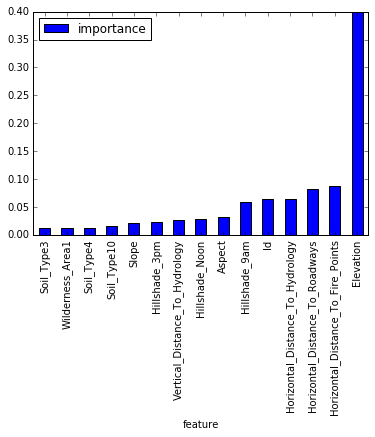

In [79]:
# Feature Selection with all Data 
print "Original Dataset Size %i X %i" %(X_train.shape[0],X_train.shape[1])

# Reduce Dataset
feature_names, X_train_reduced = find_fetaure_importnace(X_train, y_train, importance_threshold)
X_test_reduced =  X_test[feature_names]

print "Reduced Dataset Size %i X %i" %(X_train_reduced.shape[0],
                                       X_train_reduced.shape[1])
print "\nKeeping %i Columns: " % len(feature_names)
print list(feature_names)


Original Dataset Size 10584 X 11
Select only features >= 0.010 importance as predicted by Dtree
Reduced Dataset Size 10584 X 11

Keeping 11 Columns: 
['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


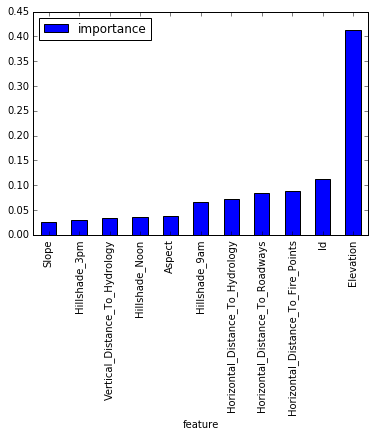

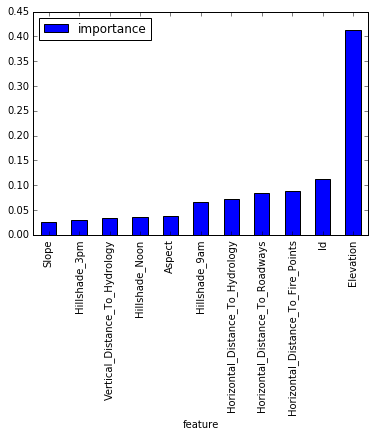

In [82]:
# Feature Selection with no Binary Data 
# Drop Binary Data 
X_train_noBin = X_train.drop(binary, axis=1)
X_test_noBin = X_test.drop(binary, axis = 1)
print "Original Dataset Size %i X %i" %(X_train_noBin.shape[0],X_train_noBin.shape[1])

# Reduce Dataset
feature_names, X_train_noBin_reduced = find_fetaure_importnace(X_train_noBin, y_train, importance_threshold)
y_train_noBin_reduced =  y_test[feature_names]
print "Reduced Dataset Size %i X %i" %(X_train_noBin.shape[0],X_train_noBin.shape[1])
print "\nKeeping %i Columns: " % len(feature_names)
print list(feature_names)


### Models

In [ ]:
# TODO: Remember results for final summary 
# model name, train data, params, rcall, precision, accuracy
results_df = pd.DataFrame(columns = ['model_name', 'train_data', 'Best Parameters',
                                     'recall','precision','accuracy'])
# rowi = pd.DataFrame({'Studio': dist,'Month':mo,'avg_Monthly_gross':np.mean(tgross),
#                             'avg_Monthly_cume_Gross':np.mean(cgross)}, index=[0]) 
#       overall_df = pd.concat([overall_df, rowi], axis = 0)

In [19]:
def fit_model(model_name, search_grid, score, train_df, train_labels, cv):
    param_searcher = GridSearchCV(model_name(), search_grid, cv=cv, scoring=score)
    param_searcher.fit(train_df, train_labels)
    return param_searcher


In [101]:
def plot_grid_scores(x,y,x_label,y_label,title):
    plt.plot(x, y, '.')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    return plt

#### ADA Boost 

In [154]:
def run_ada_boost(search_grid, train_data, train_labels, test_data, test_labels): 
    
    da_gs = fit_model(AdaBoostClassifier, search_grid, score, 
                      train_data, train_labels, cv)
    
    ada_gs.grid_scores_
    grid_scores = pd.DataFrame(ada_gs.grid_scores_)
    params = []
    for i in range(len(grid_scores['parameters'])):
        params.append(grid_scores['parameters'][i]['n_estimators'])
    
    plot_grid_scores(params,grid_scores['mean_validation_score'], "n_estimators", 
                     "Mean Validation Score","GridSearch ADA Boost")
    
    print "Best Parameters" 
    print ada_gs.best_params_
    # fit ada with best parameters
    ada = AdaBoostClassifier(algorithm=ada_gs.best_params_['algorithm'],
                            n_estimators = ada_gs.best_params_['n_estimators'])
    
    ada.fit(train_data, train_labels)
    # Print Classification Summary Scored in Development 
    print "Accuracy Score on Test Set with Best Params: %0.2f%%" % (ada.score(X_test_reduced, y_test))

    preds = ada.predict(test_data)
    print metrics.classification_report(test_labels, preds, target_names = target_names_list)
    
    return(ada)
    

In [ ]:
# Train with reduced data 
if run_adaBoost == True: 
    search_grid = {'n_estimators': np.linspace(1,400,25, dtype = int), 'algorithm': ['SAMME', 'SAMME.R']}
    
    ada = run_ada_boost(search_grid, X_train_reduced, y_train, X_test_reduced, y_test)
    
    

In [ ]:
# Train witn reduced data and no binary data 
if run_adaBoost == True: 
    search_grid = {'n_estimators': np.linspace(1,400,25, dtype = int), 'algorithm': ['SAMME', 'SAMME.R']}
    
    ada = run_ada_boost(search_grid, X_train_noBin_reduced, y_train, X_test_noBin_reduced, y_test)
    
    

In [ ]:
# test saving results to df 


#### PCA 

In [51]:
def find_best_components(n_features, X_train_data, train_labels, X_test_data, test_labels):
    pca = PCA(n_components=n_features)
    X_transformed = pca.fit_transform(X_train_data)
    lr = LinearRegression()
    lr.fit(X_transformed, train_labels)
    return lr.score(pca.transform(X_test_data), test_labels)

# out = [best_components(i) for i in range(1, 121)]


In [64]:
def report_explained_variance(train_data): 
    pca = PCA()
    pca.fit(train_data)
    X_train = pca.transform(train_data)
    var_explained = pd.Series(range(51)).apply(lambda k: sum(pca.explained_variance_ratio_[0:k]))
    
    print "Train Data Shape After PCA: %i X %i" % (X_train.shape[0],X_train.shape[1])
    print "\nVariance Explained: "
    print "n_components  |  PC var explained"
    for i in range(5):
        print "%13i |    %1.2f%%" % (i+1, var_explained[i])

    # Calculate Fraction of the total variance explained by the first k principal components, for k in [1, 50]
    print "\nFraction of Total Variance explained by first k componentes where k = [1,50]"
    plt.plot(var_explained)
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage Exaplained")
    plt.title("Percentage of Variance Explained by Principal Components")
    plt.show()
    
    return(var_explained, pca)

In [65]:
# Fetaure Mapping Plot 
def plot_feature_mapping(pca):
    Vt = pca.components_[:pca.components_.shape[0], :]
    comp0 = pd.Series(dict(zip(X_train.columns, Vt[0, :])))
    comp1 = pd.Series(dict(zip(X_train.columns, Vt[1, :])))
    col_order = comp0.sort_values().index
    plt.figure(figsize=(4, 24))
    comp0[col_order].plot(kind='barh')
    comp1[col_order].plot(kind='barh', color='red')

Train Data Shape After PCA: 10584 X 15

Variance Explained: 
n_components  |  PC var explained
            1 |    0.00%
            2 |    0.86%
            3 |    0.96%
            4 |    0.99%
            5 |    1.00%

Fraction of Total Variance explained by first k componentes where k = [1,50]


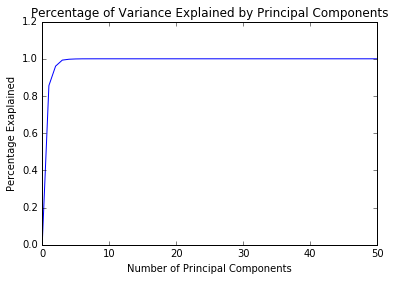

In [66]:
# if run_pca == True: 
# find variance explained for each iteration   
var_explained, pca = report_explained_variance(X_train_reduced)

# Plot for features explaination
# plot_feature_mapping(pca)

# TODO: Plot Training space


In [94]:
# Choose n_components to use for traing 
pca = PCA(n_components=3)
pca.fit(X_train_reduced)
X_train_pca = pca.transform(X_train_reduced)
X_test_pca = pca.transform(X_test_reduced)

# Try pca_score 

In [147]:
# Train models using PCA data from above 
# Linreg, GMM 


#### Guassian Mixture Model  

In [23]:
# Param search: n_components, cavariance types




In [24]:
# Look at AIC/BIC
# Should I be used PCA data with this? 
# Recreat P3 density plot with this


### Results 

In [ ]:
# Report Results for all Models for Comparison 
# Accuracy, Recall, Precision, Number of Parameters, Features Used in model 
